In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import joblib

In [40]:
dfAge = pd.read_csv('Data2/By Age 2015 - 2020.csv', dtype={'No of Arrivals': 'int', 'Year': 'int'})
dfIncome = pd.read_csv('Data2/By Annual Income Group(2019-2020).csv', dtype={'No of Arrival per Annual Income': 'int', 'Year': 'int'})
dfFreq = pd.read_csv('Data2/By Frequency of purpose(2015- 2020).csv', dtype={'No of Arrival by Frequency of purpose': 'int', 'Year': 'int'})
dfTransport = pd.read_csv('Data2/By mode of transport(2015-2020).csv')
dfOccupation = pd.read_csv('Data2/By Occupation(2015-2020).csv')
dfSex = pd.read_csv('Data2/By Sex 2015 - 2020.csv')
dfQuart = pd.read_csv('Data3/NoOfArrivals.csv')
dfStd = pd.read_csv('Data3/NoOfArrivals2CvdDeleted.csv')
dfMonth = pd.read_csv('Data3/NoOfArrivals3Foreign.csv')
dfList = [dfAge, dfIncome, dfFreq, dfTransport, dfOccupation, dfSex, dfQuart, dfStd, dfMonth]
nameList = ['Age', 'Income', 'Freq', 'Transport', 'Occupation', 'Sex', 'Arrival', 'Arrival2', 'Arrival3']
# type(dfQuart)

## preprocess

In [41]:
for i, df in enumerate(dfList):
    # for temp in toChange:
    #     try:
    #         df[temp] = df[temp].str.replace(",", "")
    #         df[temp] = pd.to_numeric(df[temp], errors="coerce")
    #     except:
    #         continue
    dfList[i] = df
    missing_values = df.isna()
    missing_counts = df.isna().sum()
    total_missing = df.isna().sum().sum()
    print(f"total missing : {total_missing}")
    print(f"type : {df.dtypes}")
    print('-----------------------------')



total missing : 0
type : Region      object
Country     object
Age         object
Arrivals     int64
Year         int32
dtype: object
-----------------------------
total missing : 0
type : Country     object
Income      object
Arrivals     int64
Year         int32
dtype: object
-----------------------------
total missing : 0
type : Country      object
Frequency    object
Arrivals      int64
Year          int32
dtype: object
-----------------------------
total missing : 0
type : Country      object
Transport    object
Year          int64
Arrivals      int64
dtype: object
-----------------------------
total missing : 0
type : Country       object
Year           int64
Arrivals       int64
Occupation    object
dtype: object
-----------------------------
total missing : 0
type : Year         int64
Arrivals     int64
Sex         object
Country     object
dtype: object
-----------------------------
total missing : 0
type : Country                          object
Arrivals                      

In [42]:
# numecalize
contentsDict = {}
for i, df in enumerate(dfList):
    name = nameList[i]
    columns = df.columns.tolist()
    temp2 = {}
    for column in columns:
        if df[column].dtype != object:
            continue
        temp = df[column].unique()
        AnyToNum = {}
        NumToAny = {}
        for j, item in enumerate(temp, start=1):
            NumToAny[j] = item
            AnyToNum[item] = j
        def converter(item):
            return AnyToNum.get(item, np.nan)
        df[column] = df[column].apply(converter)
        
        temp2[column] = [NumToAny, AnyToNum]
    contentsDict[name] = temp2


In [43]:
contentsDict

{'Age': {'Region': [{1: 'South-East Asia',
    2: 'North-East Asia',
    3: 'Asia',
    4: 'Western Europe',
    5: 'Nothern Europe',
    6: 'Europe',
    7: 'Southern/Medit. Europe',
    8: 'Northern Europe',
    9: 'Central/Eastern Europe',
    10: 'East Europe',
    11: 'America',
    12: 'South Asia',
    13: 'Oceania',
    14: 'Middle East',
    15: 'Africa'},
   {'South-East Asia': 1,
    'North-East Asia': 2,
    'Asia': 3,
    'Western Europe': 4,
    'Nothern Europe': 5,
    'Europe': 6,
    'Southern/Medit. Europe': 7,
    'Northern Europe': 8,
    'Central/Eastern Europe': 9,
    'East Europe': 10,
    'America': 11,
    'South Asia': 12,
    'Oceania': 13,
    'Middle East': 14,
    'Africa': 15}],
  'Country': [{1: 'Brunai',
    2: 'Cambodia',
    3: 'Indonesia',
    4: 'Laos',
    5: 'Malaysia',
    6: 'Myanmar',
    7: 'Philippines',
    8: 'Singapore',
    9: 'Vietnam',
    10: 'China',
    11: 'Hong Kong',
    12: 'Japan',
    13: 'Korea',
    14: 'Taiwan',
    15: 'Ot

## EDA (Rachel requested)

In [44]:
# import seaborn as sns

# # {'Total': 1,
# #     'Under 25': 2,
# #     '25 - 34': 3,
# #     '35 - 44': 4,
# #     '45 - 54': 5,
# #     '55 - 64': 6,
# #     '65 and Over': 7}

# dfAge2 = dfList[0]

# sns.heatmap(dfAge2[dfList[0]['Age'] == 1].corr(), annot=True)

In [45]:
# sns.heatmap(dfAge2[dfList[0]['Age'] == 2].corr(), annot=True)

In [46]:
# sns.heatmap(dfAge2[dfList[0]['Age'] == 3].corr(), annot=True)

In [47]:
# sns.heatmap(dfAge2[dfList[0]['Age'] == 4].corr(), annot=True)

In [48]:
# sns.heatmap(dfAge2[dfList[0]['Age'] == 5].corr(), annot=True)

In [49]:
# sns.heatmap(dfAge2[dfList[0]['Age'] == 6].corr(), annot=True)

## (useless) EDA

In [50]:
import seaborn as sns

<Axes: >

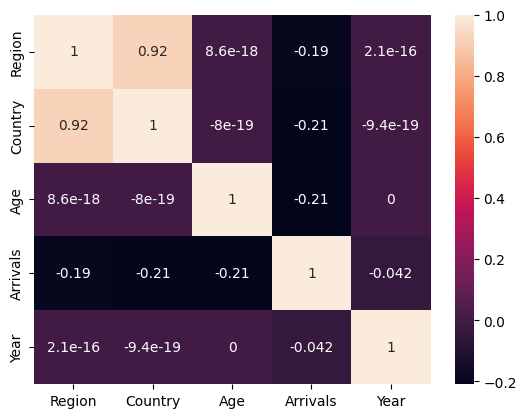

In [51]:
sns.heatmap(dfList[0].corr(), annot=True)

<Axes: >

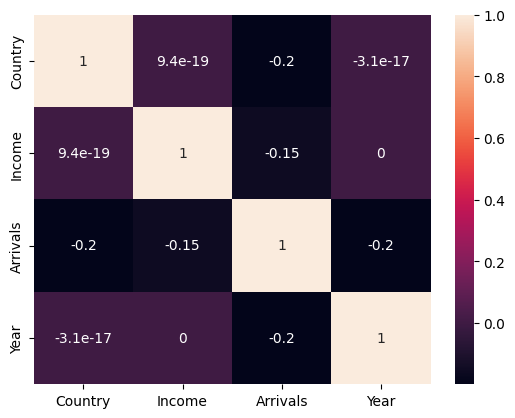

In [52]:
sns.heatmap(dfList[1].corr(), annot=True)

<Axes: >

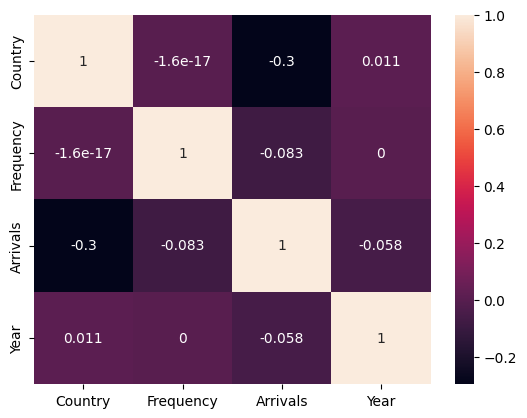

In [53]:
sns.heatmap(dfList[2].corr(), annot=True)

<Axes: >

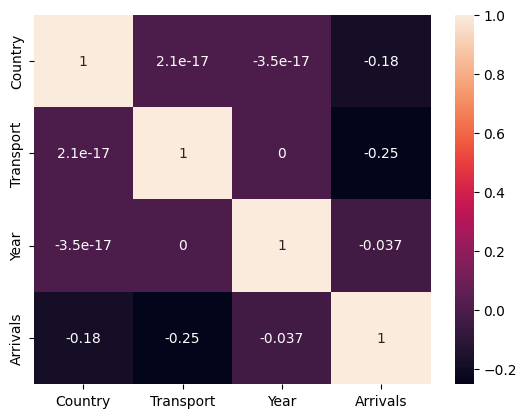

In [54]:
sns.heatmap(dfList[3].corr(), annot=True)

<Axes: >

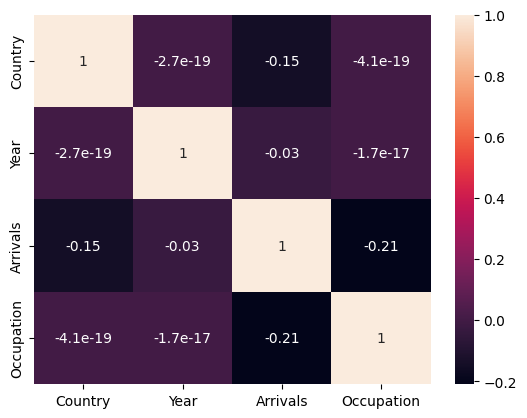

In [55]:
sns.heatmap(dfList[4].corr(), annot=True)

<Axes: >

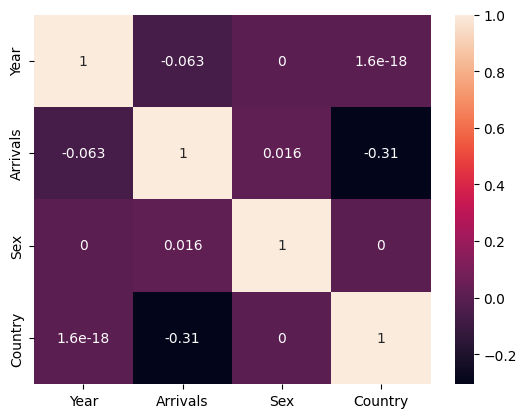

In [56]:
sns.heatmap(dfList[5].corr(), annot=True)

<Axes: >

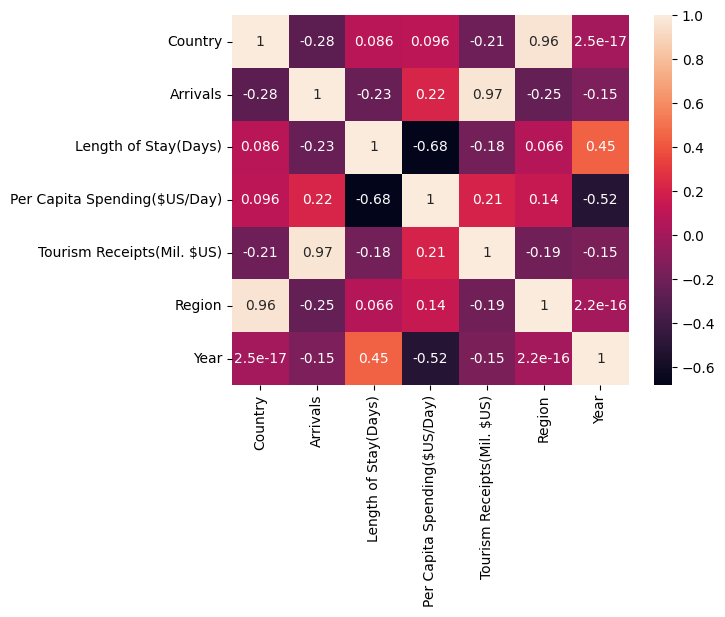

In [57]:
sns.heatmap(dfList[6].corr(), annot=True)

<Axes: >

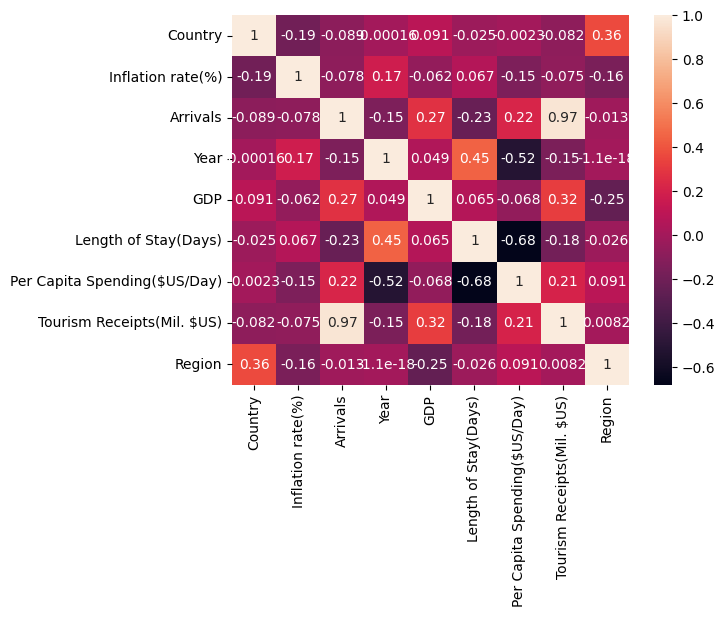

In [58]:
sns.heatmap(dfList[7].corr(), annot=True)

<Axes: >

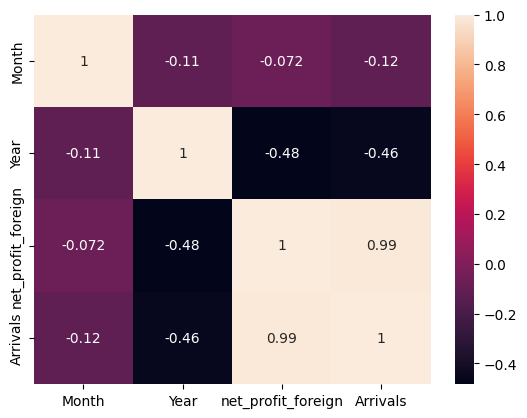

In [59]:
sns.heatmap(dfList[8].corr(), annot=True)

## Model

In [60]:

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {
    'poly_features__degree': np.arange(2, 10)
}

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

testDf = {}
Models = {}

dfList = [dfQuart, dfStd]
nameList = ['Arrival', 'Arrival2']

for i, df in enumerate(dfList):
    # split
    name = nameList[i]
    X = df[['Country', 'Year', 'Tourism Receipts(Mil. $US)']]
    y = df['Arrivals']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # test data preparation
    X_test_list = []
    y_test_list = y_test.tolist()
    for row in X_test.iterrows():
        item = []
        for j in range(3):
            item.append(row[1][j])
        X_test_list.append(item)
    data = [X_test_list, y_test_list]
    testDf[nameList[i]]=data

    # create model
    # LRModel = LinearRegression()
    # LRModel.fit(X, y)

    # grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    # grid_search.fit(X, y)
    # poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])
    # X_poly = poly.fit_transform(X)
    # PRModel = LinearRegression()
    # PRModel.fit(X_poly, y)
    # data = [LRModel, PRModel, grid_search.best_params_['poly_features__degree']]
    # print(data)
    # Models[nameList[i]]=data


    LRModel = LinearRegression()
    LRModel.fit(X_train, y_train)

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])
    X_poly = poly.fit_transform(X_train)
    PRModel = LinearRegression()
    PRModel.fit(X_poly, y_train)
    data = [LRModel, PRModel, grid_search.best_params_['poly_features__degree']]
    print(data)
    Models[nameList[i]]=data
    


[LinearRegression(), LinearRegression(), 2]
[LinearRegression(), LinearRegression(), 2]


In [61]:
# for Receipt Moddel
X_receipt = dfStd[['Country', 'Year']]
y_receipt = dfStd['Tourism Receipts(Mil. $US)']

X_train, X_test, y_train, y_test = train_test_split(X_receipt, y_receipt, test_size=0.2)

LRModel = LinearRegression()
LRModel.fit(X_train, y_train)
# test data preparation
X_test_list = []
y_test_list = y_test.tolist()
for row in X_test.iterrows():
    item = []
    for j in range(2):
        item.append(row[1][j])
    X_test_list.append(item)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
poly = PolynomialFeatures(degree=grid_search.best_params_['poly_features__degree'])
X_poly = poly.fit_transform(X_train)
PRModel = LinearRegression()
PRModel.fit(X_poly, y_train)
data = [LRModel, PRModel, grid_search.best_params_['poly_features__degree']]



LRPreds = []
PRPreds = []
for i, testVal in enumerate(X_test_list):
        
    x_pred_LR = np.array([testVal])
    # x_pred_LR = LRModel.predict(testVal2)
    LRPreds.append(LRModel.predict(x_pred_LR))
    
    x_pred_PR = np.array([testVal])
    x_pred_PR = poly.fit_transform(x_pred_PR)
    
    # x_pred_PR = PRModel.fit_transform(x_pred_PR)
    PRPreds.append(PRModel.predict(x_pred_PR))


LR_r2 = r2_score(y_test, LRPreds)
PR_r2 = r2_score(y_test, PRPreds)
LR_mse = mean_squared_error(y_test, LRPreds)
PR_mse = mean_squared_error(y_test, PRPreds)
LR_rmse = np.sqrt(LR_mse)
PR_rmse = np.sqrt(PR_mse)

print(f"Linear R2, Polynomial R2 : {LR_r2}, {PR_r2}")

print('-----------------------------------------------------------')
print(LR_mse, PR_mse)
print(LR_rmse, PR_rmse)


Linear R2, Polynomial R2 : 0.05848872440798736, 0.07863085074803966
-----------------------------------------------------------
2501561.0162318414 2448044.1233995077
1581.6323897264629 1564.62267764452


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: 

In [62]:
data

[LinearRegression(), LinearRegression(), 4]

In [63]:
# joblib.dump(PRModel, 'ReceiptsModel.joblib')

In [64]:
Models

{'Arrival': [LinearRegression(), LinearRegression(), 2],
 'Arrival2': [LinearRegression(), LinearRegression(), 2]}

## Evaluation

In [65]:

result = {}
resultMSE = {}
resultRMSE = {}


for i, name in enumerate(nameList):

    LRModel = Models[name][0]
    PRModel = Models[name][1]
    LRPreds = []
    PRPreds = []
    testVals = testDf[name][0]
    ansVal = testDf[name][1]

    poly = PolynomialFeatures(degree=Models[name][2])

    for i, testVal in enumerate(testVals):
        
        x_pred_LR = np.array([testVal])
        # x_pred_LR = LRModel.predict(testVal2)
        LRPreds.append(LRModel.predict(x_pred_LR))
        
        x_pred_PR = np.array([testVal])
        x_pred_PR = poly.fit_transform(x_pred_PR)
        
        # x_pred_PR = PRModel.fit_transform(x_pred_PR)
        PRPreds.append(PRModel.predict(x_pred_PR))

        # mse = mean_squared_error(testData[1], testPred)
    LR_r2 = r2_score(ansVal, LRPreds)
    PR_r2 = r2_score(ansVal, PRPreds)
    LR_mse = mean_squared_error(ansVal, LRPreds)
    PR_mse = mean_squared_error(ansVal, PRPreds)
    LR_rmse = np.sqrt(LR_mse)
    PR_rmse = np.sqrt(PR_mse)
    

    # print(i)
    # print(LR_r2)
    # print(PR_r2)
    result[name] = [LR_r2, PR_r2]
    resultMSE[name] = [LR_mse, PR_mse]
    resultRMSE[name] = [LR_rmse, PR_rmse]


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: 

In [66]:
print(f"First Model's R2 value \n Linear Regression : {result['Arrival'][0]} | Polynomial Regression : {result['Arrival'][1]}\n")
print(f"Second Model's R2 value \n Linear Regression : {result['Arrival2'][0]} | Polynomial Regression : {result['Arrival2'][1]}")

First Model's R2 value 
 Linear Regression : 0.9915130796418329 | Polynomial Regression : 0.9957826264632709

Second Model's R2 value 
 Linear Regression : 0.9451723737850122 | Polynomial Regression : 0.9329449060543935


In [67]:
resultMSE

{'Arrival': [18571120576.644596, 9228477370.118992],
 'Arrival2': [56408964640.12173, 68989097001.68204]}

In [68]:
resultRMSE

{'Arrival': [136275.8987372477, 96064.96432164534],
 'Arrival2': [237505.71496307562, 262657.7564087572]}

In [69]:
ArrivalModel = Models[nameList[0]][1]
ArrivalModel2 = Models[nameList[1]][1]

NewModels = [ArrivalModel, ArrivalModel2]

In [70]:
NewModels[1]

LinearRegression()

## ensemble learning

In [71]:
def predArr(Model, degree, Country, Year, Receipts):
    # numecallize input
    inputs = [
        Country,
        Year,
        Receipts
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=degree)
    x_pred = poly.fit_transform(x_pred)
    return(Model.predict(x_pred))


def predReceipt(Model, Country, Year):
    # numecallize input
    inputs = [
        Country,
        Year
              ]
    x_pred = np.array([inputs])
    poly = PolynomialFeatures(degree=data[2])
    x_pred = poly.fit_transform(x_pred)
    return(Model.predict(x_pred))



In [72]:
Region = 'South-East Asia'
Country = 'Brunai'
Age = '35 - 44'
Year = 2015
Income = 'Less than 20,000 US$'
Freq = 'Total'
Trans = 'Air'
Occu = 'Professional'
Sex = 'Male'
StayDays = 9.48
Spending = 7147.43
Receipts = 164.99
Region2 = 'Asean'
Country2 = 'Brunei'
Year2 = 'Q1/2020'
Inflation = 3.7
GDP = 16.263
Covid = 'Yes'
Month = 1
Profit = 162995.49



In [74]:
total = 0
Weights = []
def ensemble_learning(a, b, weights):
    y_pred = np.dot(weights, [a, b])
    return y_pred


total = result['Arrival'][1] + result['Arrival2'][1]
Weights2 = [result['Arrival'][1]/total, result['Arrival2'][1]/total]
print(Weights2)

a = ensemble_learning(
    predArr(NewModels[0], Models['Arrival'][2], 1, Year, Receipts),
    predArr(NewModels[1], Models['Arrival2'][2], 7, Year, Receipts),
    Weights2
)
print(predArr(NewModels[0], Models['Arrival'][2],  1, Year, Receipts))
print(predArr(NewModels[1], Models['Arrival2'][2], 7, Year, Receipts))
print(predReceipt(data[1], 1, Year))
print(a)

[0.5162899422934176, 0.48371005770658226]
[322384.49354172]
[39476.51136875]
[-790.40139771]
[185539.05715918]


In [75]:
# save model
joblib.dump(NewModels[0], 'Model1.joblib')
joblib.dump(NewModels[1], 'Model2.joblib')

['Model2.joblib']